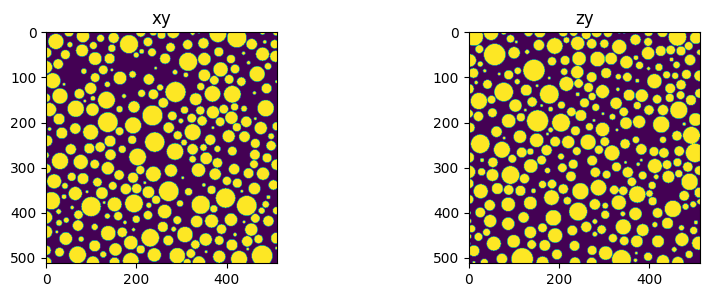

In [5]:
from skimage.io import imread
from tnia.plotting.projections import show_xy_zy_slice_center

fname = r'C:\Users\bnort\work\lamprogen\images\Simulation\Spheres2\segmentation.tif'

img = imread(fname)

fig = show_xy_zy_slice_center(img)

C:\Users\bnort\AppData\Local\Temp\ipykernel_23360\2482288979.py:1: DeprecationWarning: Please use `distance_transform_edt` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  from scipy.ndimage.morphology import distance_transform_edt


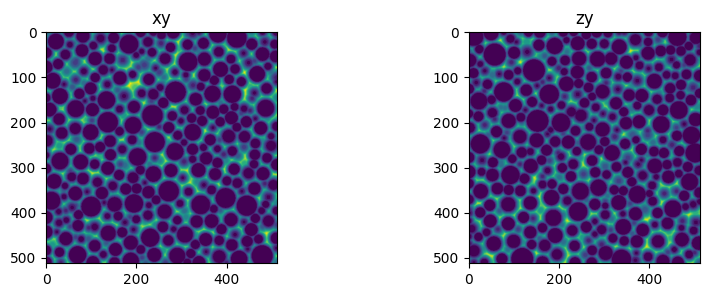

In [6]:
from scipy.ndimage.morphology import distance_transform_edt

edt1 = distance_transform_edt(img==0)

fig = show_xy_zy_slice_center(edt1)

In [9]:
import multiprocessing

num_cores = multiprocessing.cpu_count()
print("Number of CPU cores:", num_cores)


Number of CPU cores: 28


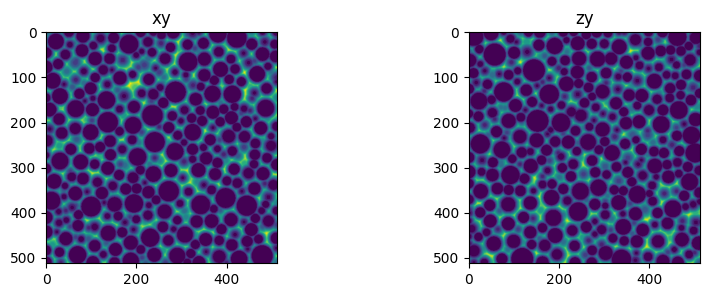

In [10]:
import edt
edt2 = edt.edt(img==0, parallel=num_cores-2)
fig = show_xy_zy_slice_center(edt2)

In [11]:
from skimage.feature import peak_local_max

peaks = peak_local_max(edt2, min_distance=10, threshold_abs=10, exclude_border=False)
print(len(peaks))

1334


In [12]:
import pyclesperanto_prototype as cle

In [14]:
test=cle.detect_maxima_box(edt2, radius_x=10, radius_y=10, radius_z=10)

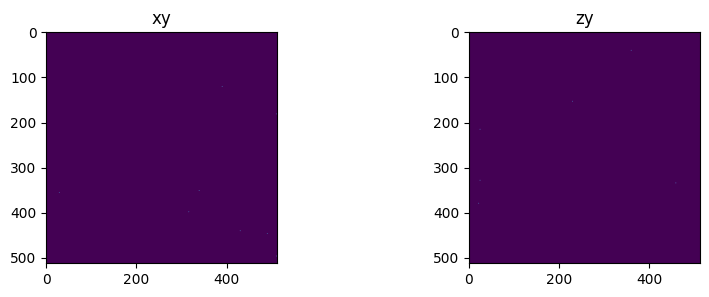

In [15]:
fig = show_xy_zy_slice_center(test)

In [17]:
test.sum()

3644.0

In [18]:
help(cle.detect_maxima_box)

Help on function detect_maxima_box in module pyclesperanto_prototype:

detect_maxima_box(source: Union[numpy.ndarray, pyclesperanto_prototype._tier0._pycl.OCLArray, pyopencl._cl.Image, pyclesperanto_prototype._tier0._pycl._OCLImage], destination: Union[numpy.ndarray, pyclesperanto_prototype._tier0._pycl.OCLArray, pyopencl._cl.Image, pyclesperanto_prototype._tier0._pycl._OCLImage] = None, radius_x: int = 0, radius_y: int = 0, radius_z: int = 0) -> Union[numpy.ndarray, pyclesperanto_prototype._tier0._pycl.OCLArray, pyopencl._cl.Image, pyclesperanto_prototype._tier0._pycl._OCLImage]
    Detects local maxima in a given square/cubic neighborhood. 
    
    Pixels in the resulting image are set to 1 if there is no other pixel in a 
    given radius which has a 
    higher intensity, and to 0 otherwise. 
    
    Parameters
    ----------
    source : Image
    destination : Image, optional
    radius_x : Number, optional
    radius_y : Number, optional
    radius_z : Number, optional
    
  